## [NYCDSA Capstone Project] 
# Women's Softball League Power Ranking Estimate

<br>
Koeun Lim (koeunlim@alum.mit.edu)<br>
Kevin Haghi (kevin.haghi@gmail.com)<br>


# Step 6-2. Modeling 2 - WS 64 Seed - Logistic Regression

---
## Project Description



### Project Outline
- Step 1. Web scraping
- Step 2. Clean data
- Step 3. EDA
- Step 4. Imputation & PCA
- Step 5-1. Modeling (1) RPI prediction based on stats - XGboost regression
- Step 5-2. Modeling (1) RPI prediction based on stats - Linear regression
- Step 6-1. Modeling (2) WS 64 Seed prediction based on stats - XGboost classification
- Step 6-2. Modeling (2) WS 64 Seed prediction based on stats - Logistic regression

In [28]:
import pandas as pd
import numpy as np
import seaborn as sn
from datetime import datetime
from scipy import stats
from matplotlib import pyplot as plt

import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

In [3]:
y_WSin = pd.read_csv('Data/y_WSin.csv')
y_WSin_2019 = pd.read_csv('Data/y_WSin_2019.csv')

X_famd = pd.read_csv('Data/X_famd.csv')
X_famd_2019 = pd.read_csv('Data/X_famd_2019.csv')
X_College = pd.read_csv('Data/X_College.csv')
X_College_2019 = pd.read_csv('Data/X_College_2019.csv')

### Logistic regression

WCWS_in
0          1387
1           384
dtype: int64
Proportion 0:  0.7831733483907397


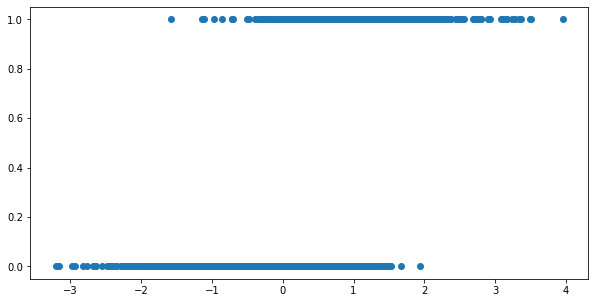

In [15]:
plt.scatter(X_famd['0'],y_WSin)
plt.show

print(y_WSin.value_counts())
print('Proportion 0: ', y_WSin.value_counts()[0]/len(y_WSin))

In [29]:
logistic = LogisticRegression(C=1e4, solver='lbfgs', multi_class='auto')
logistic.fit(X_famd, y_WSin)
print('Train set score:', logistic.score(X_famd, y_WSin))
print(confusion_matrix(y_WSin,logistic.predict(X_famd)))

print('\n\nTest set score:', logistic.score(X_famd_2019, y_WSin_2019))
print(confusion_matrix(y_WSin_2019,logistic.predict(X_famd_2019)))

Train set score: 0.8966685488424618
[[1340   47]
 [ 136  248]]


Test set score: 0.8855218855218855
[[219  14]
 [ 20  44]]


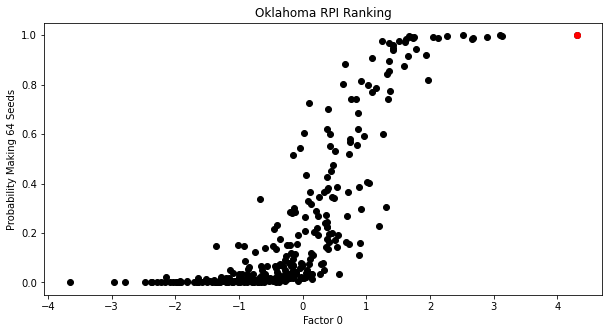

In [50]:
prob_in = logistic.predict_proba(X_famd_2019)[:,1]

idx_ex = 0
college = X_College_2019.College.loc[idx_ex]
prob_college = prob_in[idx_ex]

plt.scatter(X_famd_2019['0'],prob_in,color='k')
plt.scatter(X_famd_2019['0'][idx_ex],prob_in[idx_ex],color='r')
plt.title(college + ' RPI Ranking')
plt.ylabel('Probability Making 64 Seeds')
plt.xlabel('Factor 0')
plt.show()

# bootstrap the probability

### SGD Classifier

In [31]:
sgd = SGDClassifier(loss='log', max_iter=1e4, l1_ratio=0, alpha=1e-4, shuffle=False)

4.304510101660094

282   -2.798857
296   -3.662594
249   -2.161190
292   -2.957152
293   -2.390990
         ...   
5      1.672805
2      2.269181
3      2.514123
0      4.304510
1      3.090974
Name: 0, Length: 297, dtype: float64

array([2.22096919e-07, 2.29657645e-07, 3.67114872e-05, 4.57618447e-05,
       7.08965382e-05, 7.19959475e-05, 1.03054447e-04, 1.43337842e-04,
       2.23516980e-04, 2.42902894e-04, 3.39126364e-04, 3.50593213e-04,
       3.65110545e-04, 4.32389667e-04, 4.53243223e-04, 5.77129203e-04,
       6.08969859e-04, 7.73517996e-04, 7.89158006e-04, 8.38595815e-04,
       9.08505293e-04, 9.26710463e-04, 9.29268734e-04, 1.01972617e-03,
       1.16974522e-03, 1.39848484e-03, 1.45952061e-03, 1.48228234e-03,
       1.64819863e-03, 1.67017578e-03, 1.67333213e-03, 1.70024653e-03,
       1.80521214e-03, 1.88086053e-03, 1.94262426e-03, 2.05517758e-03,
       2.11744559e-03, 2.16557082e-03, 2.30687302e-03, 2.49715397e-03,
       2.78248516e-03, 2.81518967e-03, 2.84472342e-03, 3.01948401e-03,
       3.08228702e-03, 3.37467777e-03, 3.56509114e-03, 3.57079438e-03,
       3.93053669e-03, 4.17189032e-03, 4.18728472e-03, 4.32108678e-03,
       4.46757164e-03, 4.54453464e-03, 4.66862983e-03, 4.85255010e-03,
      